# Imports

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
df = pd.read_csv("StudentsPerformance.csv")

# EDA

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Preprocessing

In [36]:
df.replace({'gender':{"female": 1, "male": 2},
            'race/ethnicity':{'group A':1, 'group B':2 , 'group C':3 ,'group D': 4 ,'group E':5},
            'parental level of education': {"bachelor's degree":1 ,"some college":2 ,"master's degree":3,"associate's degree":4 ,'high school':5 ,'some high school':6},
            'lunch':{'standard':1 ,'free/reduced':2},
            'test preparation course':{'none':1 ,'completed':2}}, inplace = True)

C:\Users\Clinic_Laptop\AppData\Local\Temp\ipykernel_16856\3849071069.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'gender':{"female": 1, "male": 2},


# Visualization

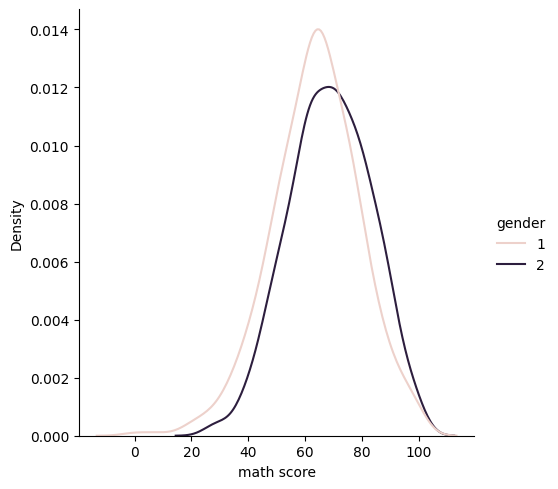

In [64]:
sns.displot(data=df,x ='math score', hue='gender', kind ='kde')

<Axes: xlabel='math score', ylabel='writing score'>

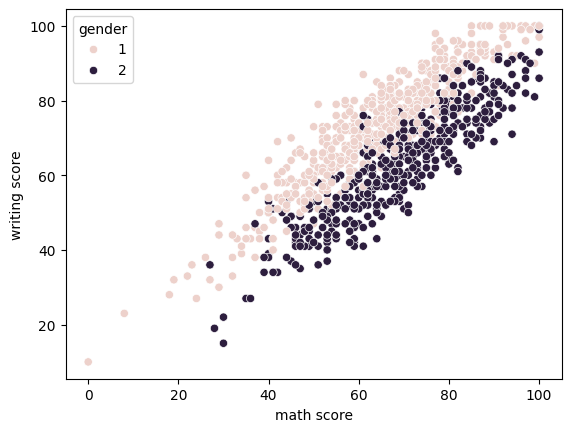

In [69]:
sns.scatterplot(data=df, x="math score", y="writing score", hue ="gender")


<Axes: >

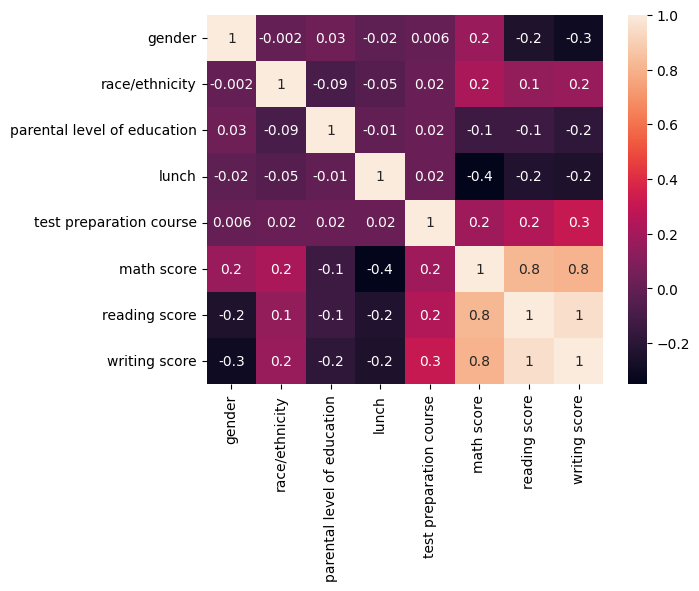

In [61]:
corr = df.corr()
sns.heatmap(corr, annot = True,fmt = ".1g")

# Model Training

In [83]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [111]:
X =df[['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course','reading score',
       'writing score']]
y =df[['math score']]

In [106]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size =0.3 ,random_state =26)

In [107]:
linreg = LinearRegression()

In [108]:
linreg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [109]:
y_pred = linreg.predict(X_test)

# Model Validation

In [110]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 4.396155763948599
MSE: 30.608386384183916
RMSE: 5.532484648345978
R² Score: 0.8761327822538119


<Axes: ylabel='Count'>

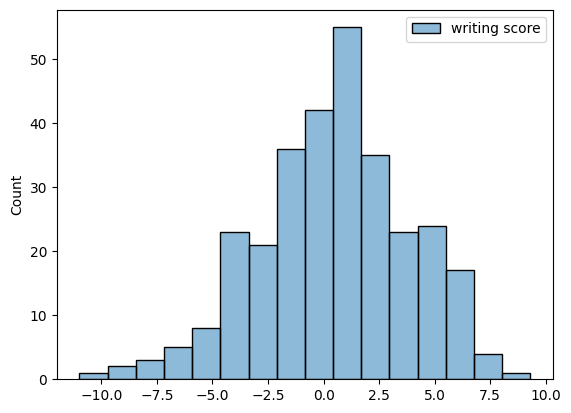

In [104]:
sns.histplot(y_test - y_pred)